<a href="https://colab.research.google.com/github/athiragp/Comprehensive-Analysis-of-Food-Nutrition-Data/blob/main/food_Nutrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


# Load the dataset
file_path = '/content/Food_nutrition.csv'
data = pd.read_csv(file_path)
df=data.copy()
# Display the first few rows of the dataset to understand its structure
data.head()


,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"""Pillsbury Golden Layer Buttermilk Biscuits, A...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"""Pillsbury, Cinnamon Rolls with Icing, refrige...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"""Kraft Foods, Shake N Bake Original Recipe, Co...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"""George Weston Bakeries, Thomas English Muffins""",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"""Waffles, buttermilk, frozen, ready-to-heat""",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


In [2]:
# Convert nutritional content columns to numeric for analysis
# We'll need to remove units and handle missing values

def convert_to_numeric(column):
    """ Convert a column with units to numeric values, handling missing data. """
    return pd.to_numeric(column.str.extract(r'([-+]?\d*\.\d+|\d+)')[0], errors='coerce')

# Converting relevant columns to numeric
data['Calories'] = convert_to_numeric(data['Calories'])
data['Protein'] = convert_to_numeric(data['Protein'])
data['Carbohydrate'] = convert_to_numeric(data['Carbohydrate'])
data['Total fat'] = convert_to_numeric(data['Total fat'])
data['Cholesterol'] = convert_to_numeric(data['Cholesterol'])
data['Fiber'] = convert_to_numeric(data['Fiber'])
data['Water'] = convert_to_numeric(data['Water'])
data['Alcohol'] = convert_to_numeric(data['Alcohol'])
data['Vitamin C'] = convert_to_numeric(data['Vitamin C'])



In [3]:
# Let's check the unique categories in the dataset
unique_categories = data['Category'].unique()
unique_categories.sort()
unique_categories


array(['American Indian/Alaska Native Foods', 'Baby Foods',
       'Baked Products', 'Beverages', 'Dairy and Egg Products',
       'Fats and Oils', 'Pork Products', 'Poultry Products',
       'Restaurant Foods', 'Sausages and Luncheon Meats', 'Snacks',
       'Sweets', 'Vegetables and Vegetable Products'], dtype=object)

In [4]:
# Filtering for 'Vegetables and Vegetable Products' category
vegetable_fruit_data = data[data['Category'] == 'Vegetables and Vegetable Products']

# Displaying some items from this category to identify potential fruits
vegetable_fruit_data['Item'].sample(10)  # Display a sample of 10 items to understand the kind of items included.


1612                                    "Watercress, raw"
1251                      "Lemon grass (citronella), raw"
1173    "Balsam-pear (bitter gourd), leafy tips, cooke...
1308    "Dandelion greens, cooked, boiled, drained, wi...
1164                         "Taro, cooked, without salt"
1310    "Eggplant, cooked, boiled, drained, without salt"
1279    "Beans, snap, canned, all styles, seasoned, so...
1307                              "Dandelion greens, raw"
1819    "New zealand spinach, cooked, boiled, drained,...
1170    "Amaranth leaves, cooked, boiled, drained, wit...
Name: Item, dtype: object

In [5]:
# Sorting the entire dataset by Vitamin C content to find the top sources
top_vitamin_c_sources = data.sort_values(by='Vitamin C', ascending=False).head(10)

top_vitamin_c_sources[['Item', 'Vitamin C']]


,Item,Vitamin C
3449,"""Babyfood, GERBER, 2nd Foods, apple, carrot an...",2732.0
2316,"""Beverages, Orange-flavor drink, breakfast typ...",2400.0
2140,"""Beverages, fruit-flavored drink, powder, with...",2400.0
1454,"""Peppers, sweet, red, freeze-dried""",1900.0
2373,"""Beverages, tea, green, instant, decaffeinated...",1342.3
1619,"""Chives, freeze-dried""",660.0
2139,"""Beverages, fruit-flavored drink, dry powdered...",560.0
983,"""Gelatin desserts, dry mix, reduced calorie, w...",490.0
637,"""Formulated bar, MARS SNACKFOOD US, SNICKERS M...",489.9
1982,"""Rose Hips, wild (Northern Plains Indians)""",426.0


**Based on the data from categories that potentially include fruits and vegetables, above output shows the top items sorted by their Vitamin C content**

In [6]:
# Function to convert the nutritional values to numeric

def convert_to_numeric(value):
    if pd.isna(value):
        return None
    try:
        return float(value.split()[0])
    except:
        return None

# Convert the 'Calories' and 'Water' columns to numeric values
df['Calories'] = df['Calories'].apply(convert_to_numeric)
df['Water'] = df['Water'].apply(convert_to_numeric)

# Display the modified dataset
df[['Item', 'Calories', 'Water']].head()


,Item,Calories,Water
0,"""Pillsbury Golden Layer Buttermilk Biscuits, A...",307.0,35.50
1,"""Pillsbury, Cinnamon Rolls with Icing, refrige...",330.0,27.86
2,"""Kraft Foods, Shake N Bake Original Recipe, Co...",377.0,3.20
3,"""George Weston Bakeries, Thomas English Muffins""",232.0,42.60
4,"""Waffles, buttermilk, frozen, ready-to-heat""",273.0,40.34


In [7]:
# Descriptive statistics for 'Calories' and 'Water'
descriptive_stats = df[['Calories', 'Water']].describe()
descriptive_stats


,Calories,Water
count,4166.000000,4166.000000
mean,228.715795,55.165540
std,195.020692,32.490975
min,0.000000,0.000000
25%,68.000000,26.705000
50%,176.000000,65.040000
75%,357.000000,83.397500
max,902.000000,100.000000


These statistics give us an overview of the distribution of calories and water content in the food items and the scatter plot to visually explore any potential relationship between these two variables.

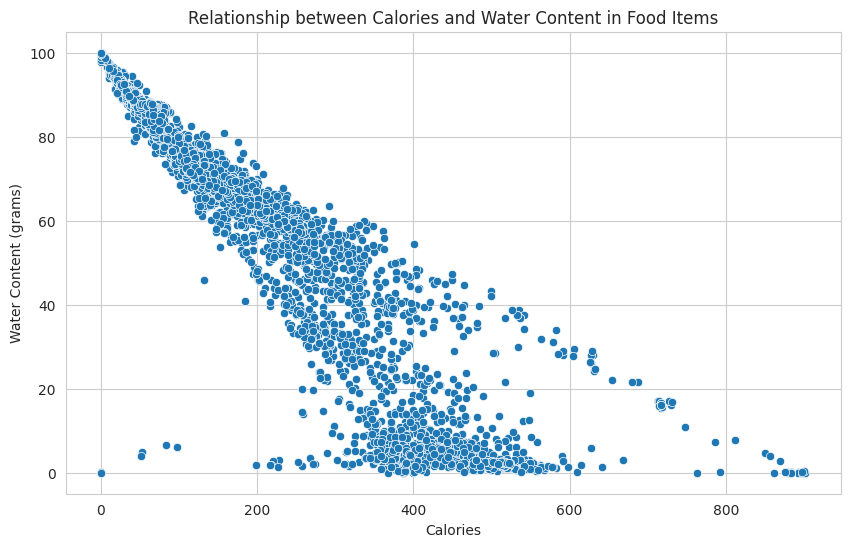

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a scatter plot for 'Calories' vs 'Water'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='Water', data=df)
plt.title('Relationship between Calories and Water Content in Food Items')
plt.xlabel('Calories')
plt.ylabel('Water Content (grams)')
plt.show()


According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the above uploaded data.

In [8]:



# Calculating the predicted calories based on the Cleveland Clinic's nutritional estimates
data['Predicted Calories'] = 9 * data['Total fat'] + 4 * data['Protein'] + 4 * data['Carbohydrate']

# Calculating the correlation coefficient between actual and predicted calories
correlation = np.corrcoef(data['Calories'], data['Predicted Calories'])[0, 1]

# Print the correlation
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.9951014421170025


In [9]:
data

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Predicted Calories
0,167512,"""Pillsbury Golden Layer Buttermilk Biscuits, A...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,NaN,NaN,307.40
1,167513,"""Pillsbury, Cinnamon Rolls with Icing, refrige...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,NaN,0.1,332.47
2,167514,"""Kraft Foods, Shake N Bake Original Recipe, Co...",Baked Products,377.0,6.10,79.80,3.70,NaN,NaN,3.20,NaN,NaN,376.90
3,167515,"""George Weston Bakeries, Thomas English Muffins""",Baked Products,232.0,8.00,46.00,1.80,NaN,NaN,42.60,NaN,NaN,232.20
4,167516,"""Waffles, buttermilk, frozen, ready-to-heat""",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0,273.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,168358,"""Pork, cured, ham, shank, bone-in, separable l...",Pork Products,177.0,21.61,0.41,9.85,61.0,0.0,65.23,0.0,0.0,176.73
4162,168359,"""Pork, cured, ham, slice, bone-in, separable l...",Pork Products,181.0,25.48,0.70,8.48,73.0,0.0,62.57,0.0,0.0,181.04
4163,168360,"""Pork, cured, ham, slice, bone-in, separable l...",Pork Products,130.0,24.36,0.00,3.59,65.0,0.0,69.97,0.0,0.0,129.75
4164,168361,"""Pork, fresh, enhanced, loin, tenderloin, sepa...",Pork Products,106.0,20.39,0.00,2.09,48.0,0.0,76.91,0.0,0.0,100.37


In [10]:
# Calculate residuals (differences between actual and predicted calories)
data['Residuals'] = data['Calories'] - data['Predicted Calories']

# Statistical summary of residuals
residuals_summary = data['Residuals'].describe()

# Identifying the items with the largest positive and negative residuals
largest_underestimations = data.nlargest(5, 'Residuals')[['Item', 'Calories', 'Predicted Calories', 'Residuals']]
largest_overestimations = data.nsmallest(5, 'Residuals')[['Item', 'Calories', 'Predicted Calories', 'Residuals']]

# Display the summary and the items with largest discrepancies
print("Statistical Summary of Residuals:\n", residuals_summary)
print("\nItems with Largest Underestimations:\n", largest_underestimations)
print("\nItems with Largest Overestimations:\n", largest_overestimations)

Statistical Summary of Residuals:
 count    4166.000000
mean       -1.406344
std        19.660430
min      -400.000000
25%        -4.327500
50%        -0.280000
75%         0.400000
max       295.000000
Name: Residuals, dtype: float64

Items with Largest Underestimations:
                                                    Item  Calories  \
2334  "Alcoholic beverage, distilled, all (gin, rum,...     295.0   
2333  "Alcoholic beverage, distilled, all (gin, rum,...     275.0   
2213  "Alcoholic beverage, distilled, all (gin, rum,...     263.0   
2212  "Alcoholic beverage, distilled, all (gin, rum,...     250.0   
2422  "Alcoholic beverage, distilled, whiskey, 86 pr...     250.0   

      Predicted Calories  Residuals  
2334                 0.0      295.0  
2333                 0.0      275.0  
2213                 0.0      263.0  
2212                 0.4      249.6  
2422                 0.4      249.6  

Items with Largest Overestimations:
                                              

The analysis suggests that the original linear model does not account for calories from alcohol and possibly overestimates the caloric contribution of certain non-digestible carbohydrates and fibers. This highlights the complexity of accurately estimating caloric content from macronutrient data alone, especially when considering foods with unique compositions or non-traditional ingredients. ​​